# Hypothesis testing for single populations

In [2]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

## Hypothesis tests for $\mu$ ($z$ statistic, $\sigma$ is known)

Let $X_1,...,X_n \sim N(\mu,\sigma)$ where $\sigma$ is known.

We want to test $H_0: \mu\leq0$ versus $H_1: \mu>0.$

Hence, $\Theta_0 = (−\infty,0]$ and $\Theta_1 = (0,\infty).$

Consider the test:

reject $H_0$ if $T > c$ where $T(X) = \bar X$.

Let $Z$ denote a standard Normal random variable. The power function is

$$\beta(\mu) = P_{\mu}(\bar X > c) 
  = P_{\mu}\Big(\frac{\sqrt{n}(\bar X − \mu)}{\sigma} > \frac{\sqrt{n}(c − \mu)}{\sigma}\Big) 
  = P\Big(Z > \frac{\sqrt{n}(c − \mu)}{\sigma}\Big) 
  =1−\Phi\Big(\frac{\sqrt{n}(c − \mu)}{\sigma}\Big).$$
  
This function is increasing in $\mu$. Hence
$$ \text{size} = \sup_{\mu\leq0} \beta(\mu) = \beta(0) = 1−\Phi\Big(\frac{\sqrt{n}c}{\sigma}\Big).$$

For a size $\alpha$ test, we set this equal to $\alpha$ and solve for $c$ to get
$$ c = \frac{\sigma \Phi^{-1} (1- \alpha)}{\sqrt{n}}.$$

We reject when $\bar X > \sigma \Phi^{-1} (1- \alpha)/\sqrt{n}.$ Equivalently, we reject when
$$\frac{\sqrt{n}(\bar X - 0)}{\sigma} > z_{\alpha},$$
where $z_{\alpha} = \Phi^{-1} (1- \alpha).$

fail to reject H_0, 0.66 <= 1.64, mean is 0.21
fail to reject H_0, 1.40 <= 1.64, mean is 0.14
reject H_0, 4.19 > 1.64, mean is 0.13
H_0 is false, loc is 0.14


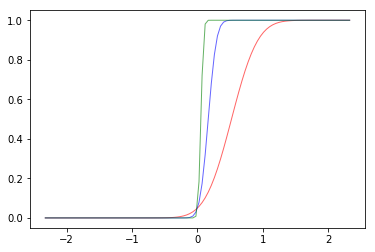

In [276]:
loc = stats.uniform.rvs()-0.5
scale=1.0
alpha = 0.05

#np.random.seed(123)
x_10 = stats.norm.rvs(loc, scale, 10)
x_100 = stats.norm.rvs(loc, scale, 100)
x_1000 = stats.norm.rvs(loc, scale, 1000)

l_sp = np.linspace(stats.norm.ppf(0.01),stats.norm.ppf(0.99), 100)

def power(alpha,n):
    c = scale*stats.norm.ppf(1-alpha)/np.sqrt(n)
    return 1 - stats.norm.cdf(np.sqrt(n)*(c-l_sp)/scale)

fig, ax = plt.subplots(1, 1)

ax.plot(l_sp, power(alpha,len(x_10)),'r-', lw=1, alpha=0.6, label='power function')
ax.plot(l_sp, power(alpha,len(x_100)),'b-', lw=1, alpha=0.6, label='power function')
ax.plot(l_sp, power(alpha,len(x_1000)),'g-', lw=1, alpha=0.6, label='power function')

def test(alpha,t,n):
    z = t*np.sqrt(n)/scale
    z_a = stats.norm.ppf(1-alpha)
    if z > z_a:
        print("reject H_0, {0:3.2f} > {1:3.2f}, mean is {2:3.2f}".format(z,z_a,t))
    else:
        print("fail to reject H_0, {0:3.2f} <= {1:3.2f}, mean is {2:3.2f}".format(z,z_a,t))
        
test(alpha,np.mean(x_10),len(x_10))
test(alpha,np.mean(x_100),len(x_100))
test(alpha,np.mean(x_1000),len(x_1000))


if loc <= 0:
    print("H_0 is true, loc is {0:3.2f}".format(loc))
else:
    print("H_0 is false, loc is {0:3.2f}".format(loc))
